In [1]:
#Main libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('diabetes (1).csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
mapper = {'Pregnancies' : 'Pregnancies', 'Glucose': 'Glucose', 'BloodPressure':'Blood Pressure', 'SkinThickness': 'Skin Thickness', 'Insulin':  'Insulin', 'BMI': 'BMI', 'DiabetesPedigreeFunction': 'Diabetes Pedigree Function', 'Age':'Age', 'Outcome': 'Outcome'}


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.rename(columns =  {'Pregnancies' : 'Pregnancies', 'Glucose': 'Glucose', 'BloodPressure':'Blood Pressure', 'SkinThickness': 'Skin Thickness', 'Insulin':  'Insulin', 'BMI': 'BMI', 'DiabetesPedigreeFunction': 'Diabetes Pedigree Function', 'Age':'Age', 'Outcome': 'Outcome'}, inplace=True)

In [7]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df.dropna()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().values.any()

False

In [14]:
#Distribution of the outcome columns

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

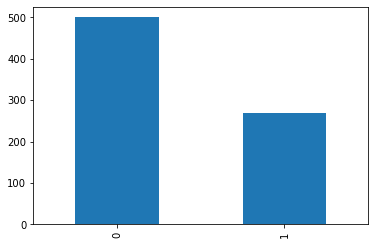

In [15]:
df['Outcome'].value_counts().plot.bar()

In [16]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
corr = df.corr()

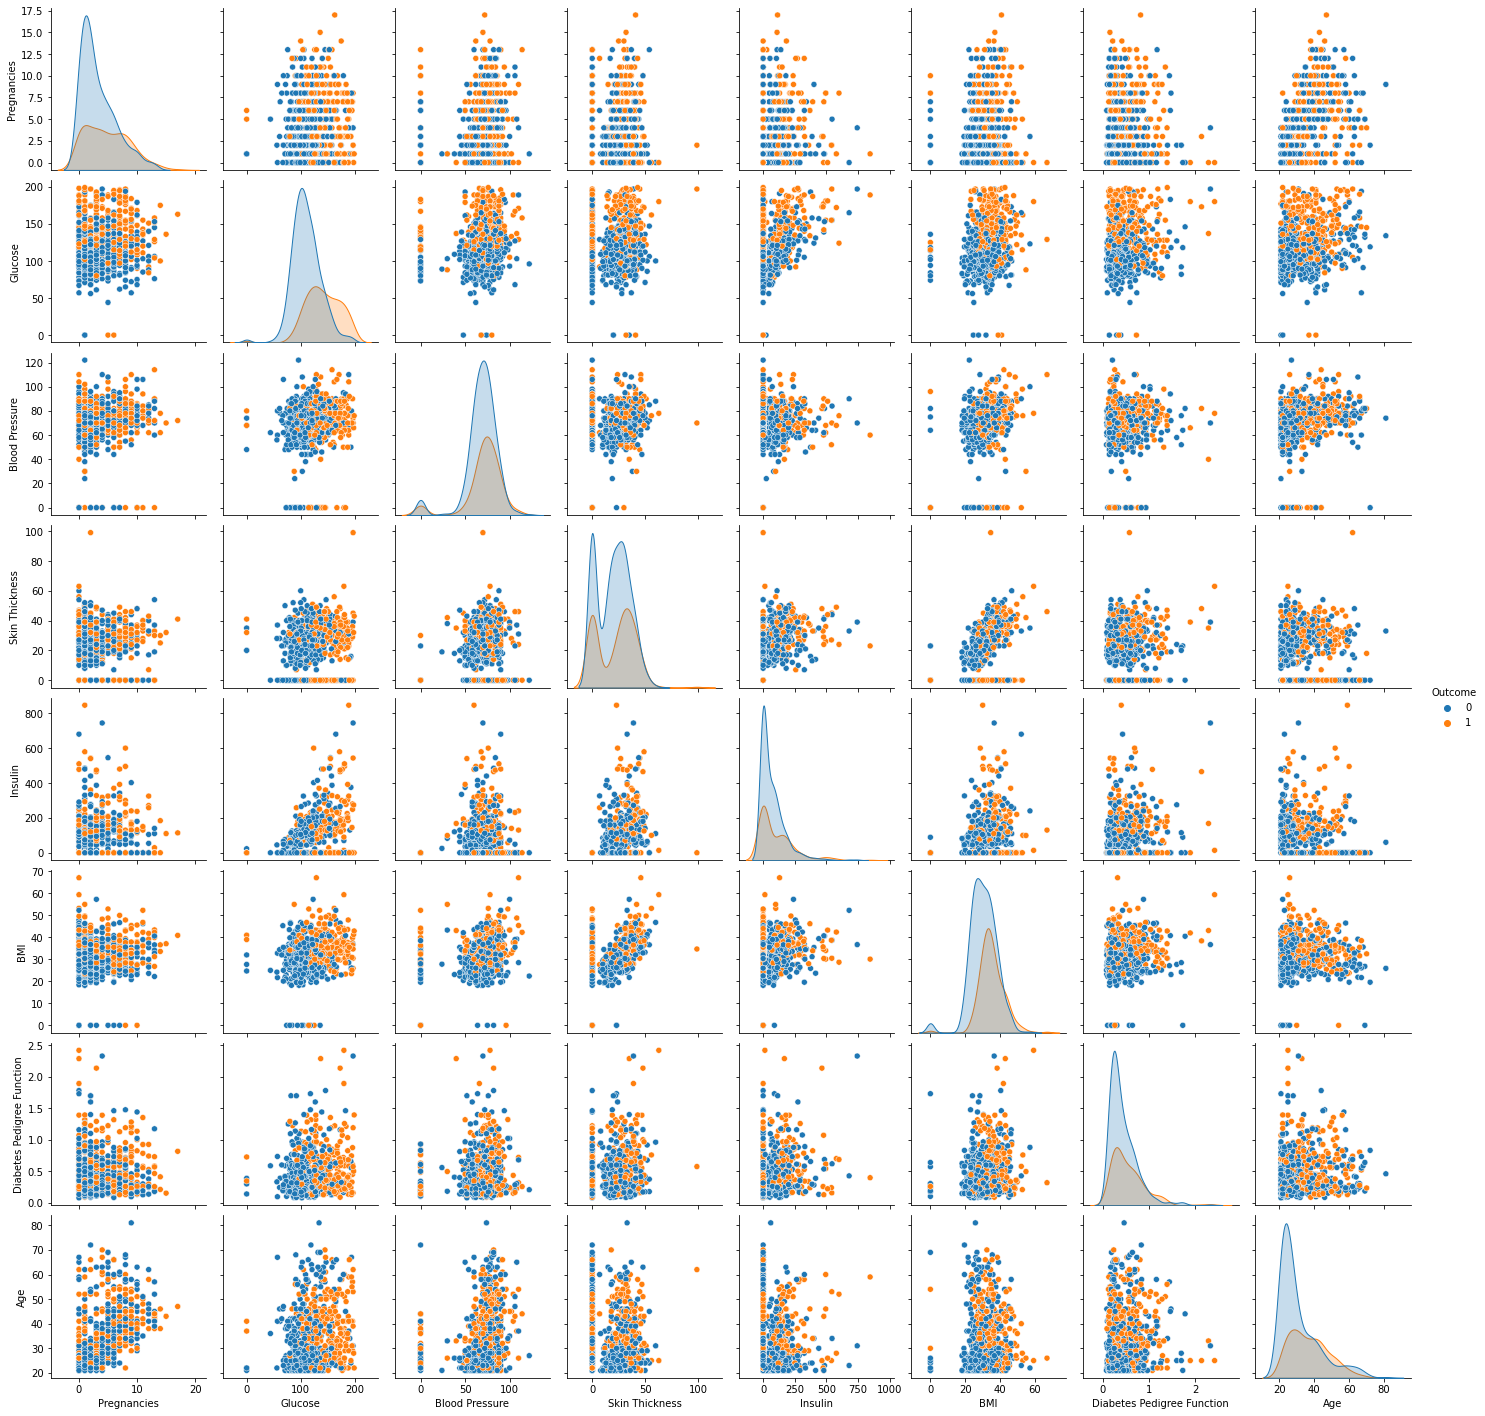

In [18]:
sns.pairplot(df, hue = 'Outcome')

In [19]:
# Models

In [20]:
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [21]:
X.shape

(768, 8)

In [22]:
X.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
y.shape

(768, 1)

In [24]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [25]:
# Logistic Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [27]:
LR = LogisticRegression()

In [28]:
LR.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = LR.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred))

0.7467532467532467


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [32]:
matr = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

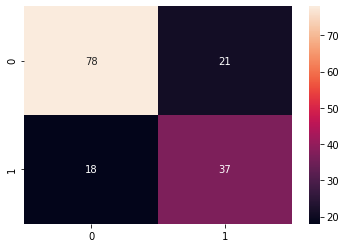

In [33]:
sns.heatmap(pd.DataFrame(matr), annot=True)

In [34]:
lg2 = LogisticRegression(penalty='l1',solver="liblinear")
lg2.fit(X_train, y_train.values.ravel())

LogisticRegression(penalty='l1', solver='liblinear')

In [35]:
y_pred2 = lg2.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_pred2))

0.7532467532467533


<AxesSubplot:>

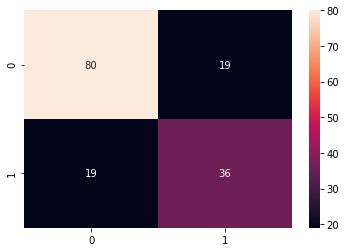

In [37]:
matr = confusion_matrix(y_test, y_pred2)
sns.heatmap(pd.DataFrame(matr), annot=True)

In [38]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [39]:
lg3 = LogisticRegression(penalty='l2',solver="sag", max_iter= 150, multi_class='multinomial')
lg3.fit(X_train, y_train.values.ravel())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=150, multi_class='multinomial', solver='sag')

In [40]:
y_pred3 = lg3.predict(X_test)

In [41]:
print(accuracy_score(y_test, y_pred3))

0.7207792207792207


<AxesSubplot:>

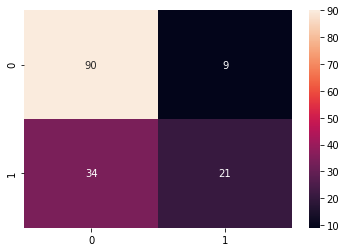

In [42]:
matr = confusion_matrix(y_test, y_pred3)
sns.heatmap(pd.DataFrame(matr), annot=True)

In [43]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        99
           1       0.70      0.38      0.49        55

    accuracy                           0.72       154
   macro avg       0.71      0.65      0.65       154
weighted avg       0.72      0.72      0.70       154



In [44]:
# Random Forest

In [45]:
rf = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-45-e458be6c1fba>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier().fit(X_train, y_train)


In [46]:
y_pred = rf.predict(X_test)

In [47]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
rf2 = RandomForestClassifier(max_depth=1, max_features=2)

In [50]:
rf2.fit(X_train, y_train)

<ipython-input-50-6ebf0dd2d4d7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)


RandomForestClassifier(max_depth=1, max_features=2)

In [51]:
y_pred2 = rf2.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred2))

0.7272727272727273


In [53]:
rf3 = RandomForestClassifier(max_depth=5, max_features=3, criterion='entropy')
rf3.fit(X_train, y_train)
y_pred3 = rf3.predict(X_test)
print(accuracy_score(y_test, y_pred3))

0.7597402597402597


<ipython-input-53-6570ed21c07c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train, y_train)


In [54]:
rf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [56]:
rf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
#Create a for loop to try different paramters automatically rather than manually
max_features = [1, 3, 5, 7]
n_estimators = [1, 2, 3, 4, 5]
criterion = ['gini', 'entropy']
performance = []

for n in n_estimators:
    for maxe in max_features:
        for cri in criterion:
            rf = RandomForestClassifier(n_estimators = n, max_features = maxe, criterion=cri, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            print(accuracy_score(y_test, y_pred))
            performance.append(accuracy_score(y_test, y_pred))
            print('Number of n_estimators {}'.format(n), 'Number of max_features {}'.format(maxe),
                 'criterion used: {}'.format(cri))
            print('NEXT')

<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

0.7142857142857143
Number of n_estimators 1 Number of max_features 1 criterion used: gini
NEXT
0.7402597402597403
Number of n_estimators 1 Number of max_features 1 criterion used: entropy
NEXT
0.7077922077922078
Number of n_estimators 1 Number of max_features 3 criterion used: gini
NEXT
0.7467532467532467
Number of n_estimators 1 Number of max_features 3 criterion used: entropy
NEXT
0.6948051948051948
Number of n_estimators 1 Number of max_features 5 criterion used: gini
NEXT
0.6688311688311688
Number of n_estimators 1 Number of max_features 5 criterion used: entropy
NEXT
0.6623376623376623
Number of n_estimators 1 Number of max_features 7 criterion used: gini
NEXT
0.6558441558441559
Number of n_estimators 1 Number of max_features 7 criterion used: entropy
NEXT
0.6948051948051948
Number of n_estimators 2 Number of max_features 1 criterion used: gini
NEXT
0.6948051948051948
Number of n_estimators 2 Number of max_features 1 criterion used: entropy
NEXT
0.7012987012987013
Number of n_esti

<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-90-87557894baa4>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [77]:
rf = RandomForestClassifier(n_estimators = 4, max_features = 5, criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7142857142857143


<ipython-input-77-d3781c0c0a13>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [69]:
print(classification_report(y_test, y_pred))
matr = confusion_matrix(y_test, y_pred3)
sns.heatmap(pd.DataFrame(matr), annot=True)

In [91]:
performance

[0.7142857142857143,
 0.7402597402597403,
 0.7077922077922078,
 0.7467532467532467,
 0.6948051948051948,
 0.6688311688311688,
 0.6623376623376623,
 0.6558441558441559,
 0.6948051948051948,
 0.6948051948051948,
 0.7012987012987013,
 0.7142857142857143,
 0.7272727272727273,
 0.6883116883116883,
 0.6493506493506493,
 0.6883116883116883,
 0.6948051948051948,
 0.7207792207792207,
 0.7467532467532467,
 0.7337662337662337,
 0.6948051948051948,
 0.6883116883116883,
 0.6883116883116883,
 0.7012987012987013,
 0.6818181818181818,
 0.7012987012987013,
 0.7532467532467533,
 0.7532467532467533,
 0.7337662337662337,
 0.7272727272727273,
 0.7207792207792207,
 0.6883116883116883,
 0.6753246753246753,
 0.7077922077922078,
 0.7532467532467533,
 0.7402597402597403,
 0.7337662337662337,
 0.6883116883116883,
 0.7207792207792207,
 0.6818181818181818]

In [93]:
performance.sort()
print(performance[-1])

0.7532467532467533


In [94]:
#The two best performing models
#Number of n_estimators 4 Number of max_features 1 criterion used: entropy
#NEXT
#0.7532467532467533
#Number of n_estimators 4 Number of max_features 3 criterion used: gini
#NEXT
#0.7532467532467533

0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

bootstrap  :  True
ccp_alpha  :  0.0
class_weight  :  None
criterion  :  gini
max_depth  :  None
max_features  :  3
max_leaf_nodes  :  None
max_samples  :  None
min_impurity_decrease  :  0.0
min_impurity_split  :  None
min_samples_leaf  :  1
min_samples_split  :  2
min_weight_fraction_leaf  :  0.0
n_estimators  :  4
n_jobs  :  None
oob_score  :  False
random_state  :  42
verbose  :  0
warm_start  :  False


<ipython-input-121-597c27733b92>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


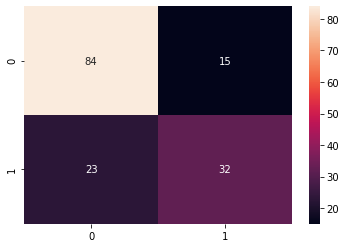

In [121]:
rf = RandomForestClassifier(n_estimators = 4, max_features = 3, criterion='gini', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
matr = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(matr), annot=True)
for key, value in rf.get_params().items():
    print(key, ' : ', value)